In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
file_path = '../Dataset/SurveyData/SurveyData_CSV_DAP_2021_HLES_dog_owner_v1.0.csv'

In [6]:
HLES = pd.read_csv(file_path)
HLES

/var/folders/zd/3_6frj8s08b9zb1f3y0xqr2r0000gn/T/ipykernel_8181/1701113859.py:1: DtypeWarning: Columns (5,21,75,77,79,81,83,85,87,89,191,192,193,194,195,196,197,198,199,200,201,204,214,285,295,516,566) have mixed types. Specify dtype option on import or set low_memory=False.
  HLES = pd.read_csv(file_path)


,dog_id,owner_id,st_hles_completion_date,dd_breed_pure_or_mixed,dd_breed_pure,dd_breed_pure_non_akc,dd_breed_mixed_primary,dd_breed_mixed_secondary,dd_age_years,dd_age_basis,...,oc_primary_residence_state,oc_primary_residence_census_division,oc_primary_residence_ownership,oc_primary_residence_ownership_other_description,oc_primary_residence_time_percentage,oc_secondary_residence,oc_secondary_residence_state,oc_secondary_residence_ownership,oc_secondary_residence_ownership_other_description,oc_secondary_residence_time_percentage
0,10509,14660,2020-10-17,2,NaN,NaN,16.0,999.0,16.333333,2,...,MO,4.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
1,74227,16755,2020-10-26,2,NaN,NaN,133.0,12.0,1.833333,1,...,MD,5.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
2,32487,8568,2020-09-07,1,159.0,NaN,NaN,NaN,13.000000,3,...,VA,5.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN
3,63150,5380,2020-08-21,2,NaN,NaN,999.0,999.0,13.000000,3,...,CA,9.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
4,33369,15957,2020-10-23,2,NaN,NaN,230.0,82.0,2.166667,1,...,OH,3.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33167,91849,32736,2021-06-22,2,NaN,NaN,276.0,1.0,10.000000,3,...,CA,9.0,2,NaN,5.0,True,NH,2.0,NaN,1.0
33168,33783,9482,2020-09-15,2,NaN,NaN,130.0,195.0,3.000000,3,...,WA,9.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN
33169,98862,32312,2021-05-25,2,NaN,NaN,60.0,49.0,4.000000,3,...,AR,7.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
33170,99462,32692,2021-06-18,2,NaN,NaN,204.0,27.0,0.916667,1,...,WA,9.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN


In [7]:
primary_state = HLES[['oc_primary_residence_state', 'oc_primary_residence_census_division']]
primary_state

,oc_primary_residence_state,oc_primary_residence_census_division
0,MO,4.0
1,MD,5.0
2,VA,5.0
3,CA,9.0
4,OH,3.0
...,...,...
33167,CA,9.0
33168,WA,9.0
33169,AR,7.0
33170,WA,9.0


In [8]:
primary_residence = HLES[['dog_id', 'oc_primary_residence_census_division']]
primary_residence = primary_residence.dropna()
onehot_enc_primary_residence = pd.get_dummies(primary_residence['oc_primary_residence_census_division'], prefix='oc_primary_census_division_', dummy_na=False)
id_primary_residence = pd.concat([primary_residence[['dog_id']], onehot_enc_primary_residence], axis=1)
id_primary_residence

,dog_id,oc_primary_census_division__1.0,oc_primary_census_division__2.0,oc_primary_census_division__3.0,oc_primary_census_division__4.0,oc_primary_census_division__5.0,oc_primary_census_division__6.0,oc_primary_census_division__7.0,oc_primary_census_division__8.0,oc_primary_census_division__9.0
0,10509,False,False,False,True,False,False,False,False,False
1,74227,False,False,False,False,True,False,False,False,False
2,32487,False,False,False,False,True,False,False,False,False
3,63150,False,False,False,False,False,False,False,False,True
4,33369,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
33167,91849,False,False,False,False,False,False,False,False,True
33168,33783,False,False,False,False,False,False,False,False,True
33169,98862,False,False,False,False,False,False,True,False,False
33170,99462,False,False,False,False,False,False,False,False,True


In [9]:
id_primary_residence.to_pickle('features/primary_residence_census_division.pkl')
id_primary_residence.to_csv('features/primary_residence_census_division.csv', index=False)

In [10]:
HLES[['oc_primary_residence_state']].value_counts()

oc_primary_residence_state
WA                            3801
CA                            3137
TX                            2159
FL                            1540
NY                            1302
CO                            1216
PA                            1172
NC                            1133
IL                            1084
VA                            1050
OH                            1014
OR                             993
MA                             948
MI                             917
IN                             913
AZ                             800
WI                             781
MN                             744
GA                             736
MD                             731
NJ                             502
MO                             477
SC                             450
TN                             421
CT                             405
ID                             302
NM                             301
UT                          

In [11]:
HLES[['oc_primary_residence_census_division']].value_counts()

oc_primary_residence_census_division
9.0                                     8210
5.0                                     5979
3.0                                     4703
8.0                                     3463
2.0                                     2971
7.0                                     2671
1.0                                     2100
4.0                                     2028
6.0                                     1011
Name: count, dtype: int64

In [12]:
HLES[['oc_primary_residence_state']].nunique()

oc_primary_residence_state    51
dtype: int64

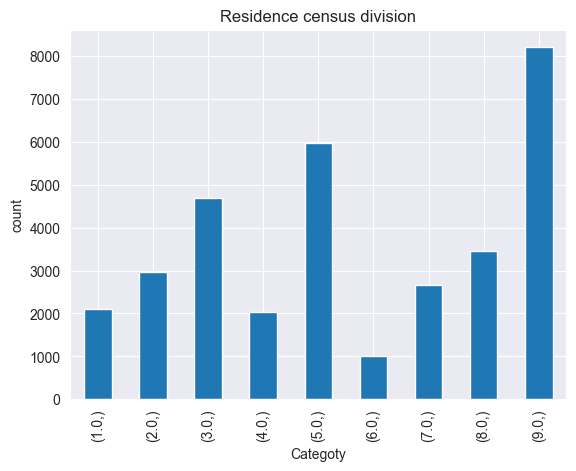

In [13]:
value_counts = HLES[['oc_primary_residence_census_division']].value_counts()
value_counts.sort_index().plot(kind='bar')

plt.title('Residence census division')
plt.xlabel('Categoty')
plt.ylabel('count')

plt.show()